In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

C:\Users\Fatih\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


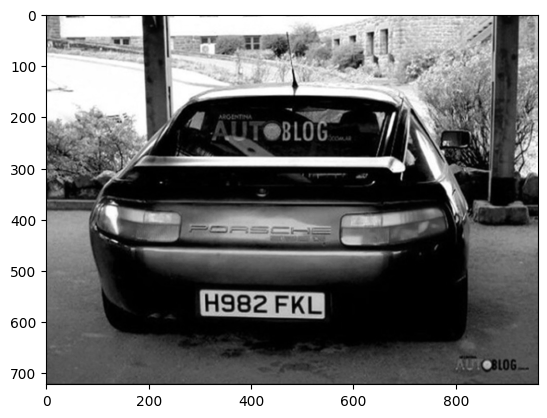

In [2]:
img = cv2.imread("images/image3.png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray")

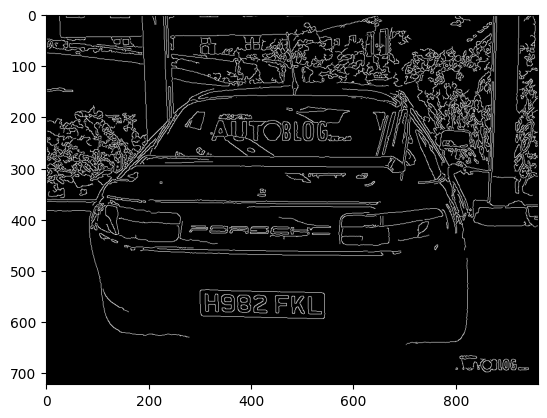

In [3]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [4]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea,reverse=True)[:10]

In [5]:
contours

[array([[[311, 537]],
 
        [[310, 538]],
 
        [[302, 538]],
 
        [[300, 540]],
 
        [[300, 565]],
 
        [[301, 566]],
 
        [[301, 583]],
 
        [[302, 584]],
 
        [[302, 586]],
 
        [[303, 587]],
 
        [[303, 588]],
 
        [[305, 588]],
 
        [[306, 589]],
 
        [[340, 589]],
 
        [[341, 590]],
 
        [[386, 590]],
 
        [[387, 591]],
 
        [[419, 591]],
 
        [[420, 592]],
 
        [[470, 592]],
 
        [[471, 593]],
 
        [[508, 593]],
 
        [[509, 594]],
 
        [[541, 594]],
 
        [[543, 592]],
 
        [[543, 586]],
 
        [[544, 585]],
 
        [[544, 584]],
 
        [[543, 583]],
 
        [[543, 546]],
 
        [[541, 544]],
 
        [[539, 544]],
 
        [[538, 543]],
 
        [[505, 543]],
 
        [[504, 542]],
 
        [[457, 542]],
 
        [[456, 541]],
 
        [[454, 541]],
 
        [[453, 542]],
 
        [[452, 542]],
 
        [[451, 541]],
 
        [[401, 5

In [6]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [7]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

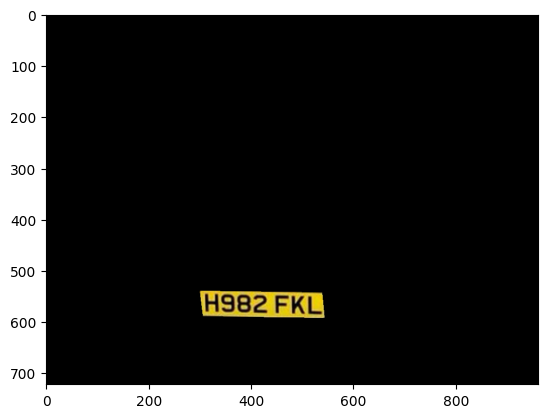

In [8]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [9]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

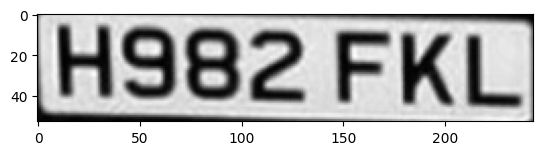

In [10]:
plt.imshow(cropped_image,cmap="gray")

In [11]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[0, 0], [244, 0], [244, 53], [0, 53]], 'H982 FKL', 0.9757376651726158)]

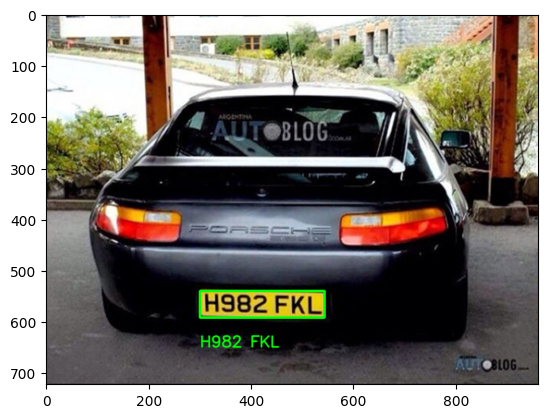

In [12]:
text = result[0][-2]
res = cv2.putText(img, text=text, org=(location[0][0][0], location[1][0][1]+60), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(location[0][0]), tuple(location[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))